In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
from scipy.stats import shapiro
from scipy.stats import normaltest

In [5]:
home_dir = 'G:\My Drive\\researches\\nyu\\road-construction-local-dk\data_online_2022\\'
map_dir = 'active_map/'
data_dir  = 'data/preprocessed'
out_dir = home_dir + 'figures/figures_all/'
R_out_dir = home_dir + 'R_analysis_data/'

In [6]:
data_puzzle_level = pd.read_csv(R_out_dir +  'data.csv')
puzzleID_order_data = data_puzzle_level.sort_values(["subjects","puzzleID"])
data_choice_level = pd.read_csv(R_out_dir +  'choice_level/choicelevel_data.csv')

## individual number of connected cities

In [7]:
numCity_basic = data_puzzle_level[data_puzzle_level['condition']==0].groupby(['subjects'])['numCities'].mean()
numCity_undo = data_puzzle_level[data_puzzle_level['condition']==1].groupby(['subjects'])['numCities'].mean()
mas =  np.mean(data_puzzle_level['mas'])

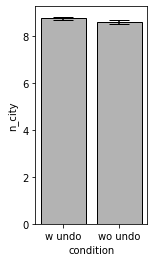

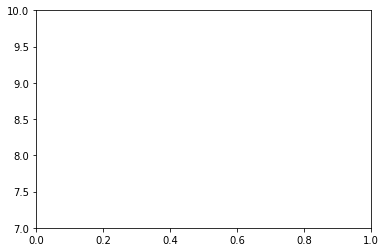

In [8]:

from scipy.stats import wilcoxon

fig, axs = plt.subplots(1, 1)

stat1, p1 = wilcoxon(np.array(numCity_undo), np.array(numCity_basic))

mean_undo_ = [np.mean(np.array(numCity_undo)), np.mean(np.array(numCity_basic))]
std_undo_ = [np.std(np.array(numCity_undo)), np.std(np.array(numCity_basic))] / np.sqrt(101)
# std_undo_ = np.std([np.mean(np.array(numCity_undo), axis=0), np.mean(np.array(numCity_basic), axis=0)], axis=1) / np.sqrt(101)

axs.bar([1, 2], mean_undo_, yerr=std_undo_, color=[[0.7, 0.7, 0.7], [0.7, 0.7, 0.7]],
        align='center', alpha=1, width=.8, edgecolor='black', ecolor='black', capsize=10)

axs.set_xlabel('condition')
axs.set_ylabel('n_city')
axs.set_xticks([1, 2])
axs.yaxis.grid(False)
axs.set_xticklabels(['w undo', 'wo undo'])
fig.set_figheight(4)
fig.set_figwidth(2)
plt.show()
plt.ylim([7, 10])
fig.savefig(out_dir + 'nct_condition_.pdf', dpi=600, bbox_inches='tight')
fig.savefig(out_dir + 'nct_condition_.png', dpi=600, bbox_inches='tight')
axs.set_title('p=' + str(p1))
fig.savefig(out_dir + 'nct_condition_p1.pdf', dpi=600, bbox_inches='tight')
fig.savefig(out_dir + 'nct_condition_p1.png', dpi=600, bbox_inches='tight')
# plt.close(fig)


In [9]:
from scipy.stats import shapiro


# shapiro
print(p1)
print(shapiro(numCity_undo))
print(shapiro(numCity_basic))

5.132514899731665e-11
(0.6592855453491211, 5.644149833920406e-14)
(0.5615794658660889, 7.054000387483167e-16)


<IPython.core.display.Javascript object>


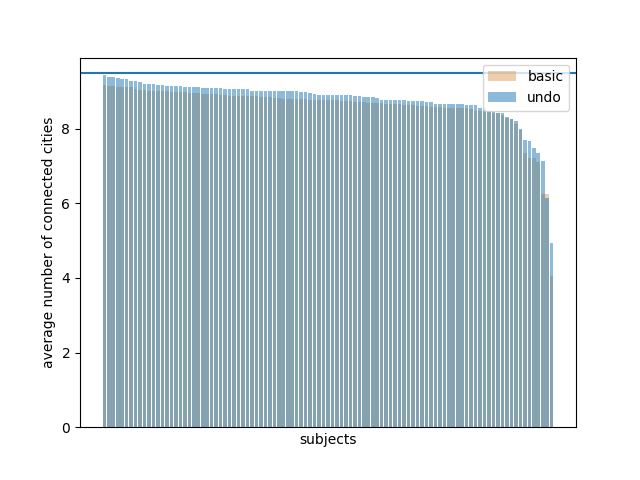

In [10]:
%matplotlib notebook

n_sub = len(numCity_basic)
fig0, ax0 = plt.subplots()
subInd = [x+1 for x in sorted(range(len(numCity_basic)),key=lambda k:list(numCity_basic)[k])]
sorted_numCity_undo = [numCity_undo[x] for x in subInd]
ax0.bar(list(range(1,n_sub+1)),sorted(numCity_basic),color = "#dda15e",alpha=0.5,label='basic')
ax0.bar(list(range(1,n_sub+1)),sorted(sorted_numCity_undo),alpha=0.5,label='undo')
ax0.axhline(mas)
ax0.invert_xaxis()
ax0.set_xticks([])
# ax0.set_xticklabels(subInd,{'fontsize': 6})
ax0.set_xlabel("subjects")
ax0.set_ylabel("average number of connected cities")
ax0.legend()
# fig0.suptitle('Relative change of count of defer in group condition compared to self condition')
# print('the mean of relative change in group level is:'+ str(statistics.mean(groupDeferRate)))
plt.show()
fig0.savefig(out_dir + 'connected_individual.png', dpi=600, bbox_inches='tight')

<IPython.core.display.Javascript object>


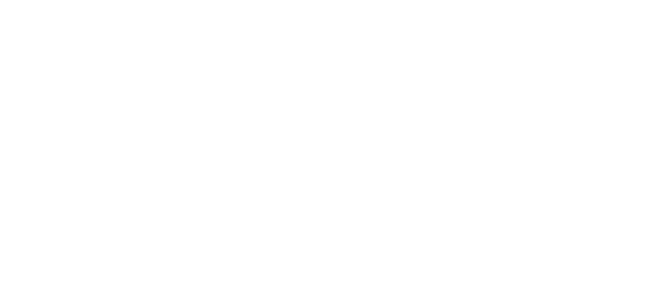

In [11]:

n_sub = len(numCity_basic)
fig0, ax0 = plt.subplots()
subInd = [x+1 for x in sorted(range(len(numCity_basic)),key=lambda k:list(numCity_basic)[k])]
sorted_numCity_undo = [numCity_undo[x] for x in subInd]
ax0.bar(list(np.array(range(1,n_sub+1))),sorted(sorted_numCity_undo),alpha=1,label='undo')
ax0.bar(list(np.array(range(1,n_sub+1))),sorted(numCity_basic),color = "#dda15e",alpha=1,label='basic')
ax0.set_xlim(0,102)
ax0.set_ylim(0,10)
ax0.axhline(mas)
ax0.invert_xaxis()
ax0.set_xticks([])
# ax0.set_xticklabels(subInd,{'fontsize': 6})
ax0.set_xlabel("Subject")
# ax0.set_ylabel("average number of connected cities")
fig0.set_figheight(3)
fig0.set_figwidth(6.5)
ax0.legend()
# fig0.suptitle('Relative change of count of defer in group condition compared to self condition')
# print('the mean of relative change in group level is:'+ str(statistics.mean(groupDeferRate)))
plt.show()
fig0.savefig(out_dir + 'connected_individual_.png', dpi=600, bbox_inches='tight')
plt.close(fig0)

<IPython.core.display.Javascript object>


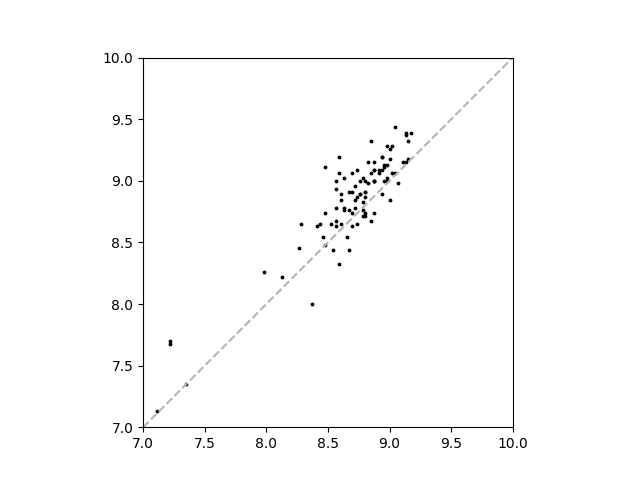

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


In [12]:

fig, ax0 = plt.subplots(1,1)
ax0.plot([7,10],[7,10],'--',c=[.7,.7,.7])
ax0.scatter(numCity_basic, numCity_undo, s=3, c=[0,0,0])
# ax0.axis('equal')
ax0.set_xlim(7,10)
ax0.set_ylim(7,10)
ax0.set_aspect('equal', adjustable='box')

fig0.set_figheight(3)
fig0.set_figwidth(2.8)
fig.savefig(out_dir + 'scatter.png', dpi=600, bbox_inches='tight')
fig.savefig(out_dir + 'scatter.pdf', bbox_inches='tight')
# plt.close(fig)


In [13]:
numCity_basic

subjects
1      8.804348
2      8.739130
3      7.978261
4      8.760870
5      8.565217
         ...   
97     8.760870
98     8.782609
99     9.173913
100    8.826087
101    8.782609
Name: numCities, Length: 101, dtype: float64

<IPython.core.display.Javascript object>


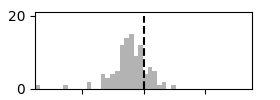

In [14]:

func_rotate = lambda x,y : [np.sqrt(x**2+y**2)*np.cos(np.arctan(1) + np.arctan(y/x)), np.sqrt(x**2+y**2)*np.sin(np.arctan(1) + np.arctan(y/x))]
undo_ = func_rotate(np.array(numCity_basic), np.array(numCity_undo))

xmin=-10*np.cos(np.pi/4)
xmax=10*np.cos(np.pi/4)
fig, ax0 = plt.subplots(1,1)
ax0.vlines(0,0,20,linestyles='dashed',colors='k')
ax0.hist(undo_[0], bins = 30,
             color = [.7,.7,.7], edgecolor = 'none')
ax0.set_xlim(np.min(undo_[0]),-np.min(undo_[0]))
# ax0.set_xlim(-2,2)
fig.set_figheight(1)
fig.set_figwidth(2.8)
fig.savefig(out_dir + 'scatter_hist.png', dpi=600, bbox_inches='tight')
fig.savefig(out_dir + 'scatter_hist.pdf', bbox_inches='tight')

## individual counts of undoing

In [16]:
num_undo = data_puzzle_level[data_puzzle_level['condition']==1].groupby(['subjects'])['numUNDO'].mean()
num_undo = data_puzzle_level[data_puzzle_level['condition']==1].groupby(['subjects'])['numFullUndo'].mean()

In [15]:
data_puzzle_level.keys()

Index(['subjects', 'puzzleID', 'reward', 'numCities', 'mas', 'nos', 'leftover',
       'numError', 'sumSeverityErrors', 'condition', 'numUNDO', 'numFullUndo',
       'numEnd', 'TT', 'RT1', 'RTlater', 'RTsubmit', 'tortuosity'],
      dtype='object')

<IPython.core.display.Javascript object>


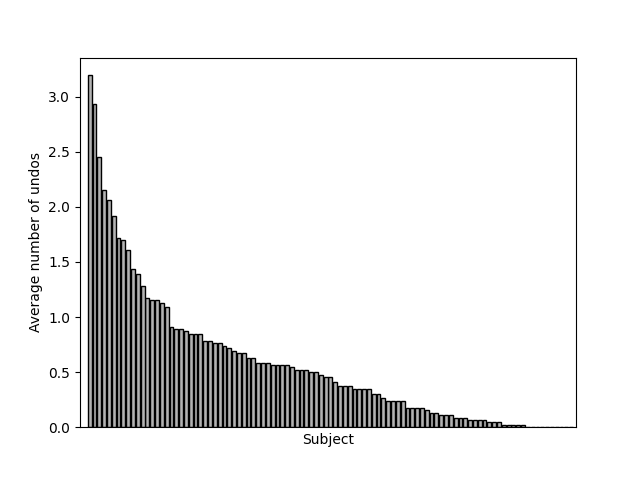

In [17]:
%matplotlib notebook

n_sub = len(num_undo)
fig0, ax0 = plt.subplots()
subInd = [x+1 for x in sorted(range(len(num_undo)),key=lambda k:list(num_undo)[k])]
ax0.bar(list(range(1,n_sub+1)),sorted(num_undo),color = [.7,.7,.7], edgecolor=[0,0,0])
ax0.set_xlim(0, n_sub+2)
ax0.set_xlabel("Subject")
ax0.set_ylabel("Average number of undos")
ax0.invert_xaxis()
ax0.set_xticks([])
fig0.savefig(out_dir + 'average_undo.png', dpi=600, bbox_inches='tight')
fig0.savefig(out_dir + 'average_undo.pdf', bbox_inches='tight')
